In [34]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
pd.options.display.float_format = '{:,.2f}'.format

In [29]:
im = cv2.imread('5.jpeg',0)
# image = pyplot.imread('img1.jpg')

In [30]:
# imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# plt.imshow(imgray)
# plt.show()

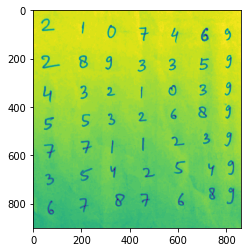

In [31]:
gblur_im = cv2.GaussianBlur(im, (11,11), 0)
plt.imshow(gblur_im)
plt.show()

In [32]:
ret,thresh1 = cv2.threshold(gblur_im,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	#bound the images
	cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),3)

In [33]:
i = 30
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	#following if statement is to ignore the noises and save the images which are of normal size(character)
	#In order to write more general code, than specifying the dimensions as 100,
	# number of characters should be divided by word dimension
	if (w>30 and h>30):#or(w>100 and h<30): 
		#save individual images
		cv2.imwrite(str(i)+".jpg",thresh1[y:y+h,x:x+w])
		i=i+1

In [8]:

centroids = []
for cnt in contours:
    M = cv2.moments(cnt)
    Cx = M['m10']/M['m00']
    Cy = M['m01']/M['m00']
    centroids.append((Cx, Cy, cnt))

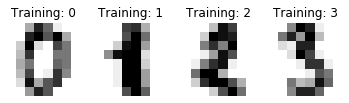

In [9]:
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

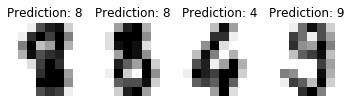

In [14]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

[1]


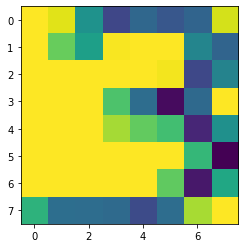

In [19]:
img = cv2.imread('5.jpg', 0)

dim = (8, 8)
# resize image
resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
img_unrolled = resized_img.ravel()
value = classifier.predict([img_unrolled])
print(value)
plt.imshow(resized_img)

In [36]:
j = 0
for i in range(4, 11):
    img = cv2.imread(str(i)+".jpeg", 0)
    gblur = cv2.GaussianBlur(img, (11,11), 0)
    ret,thresh1 = cv2.threshold(gblur,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        #bound the images
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),3)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        #following if statement is to ignore the noises and save the images which are of normal size(character)
        #In order to write more general code, than specifying the dimensions as 100,
        # number of characters should be divided by word dimension
        if (w>30 and h>30):#or(w>100 and h<30): 
            #save individual images
            cv2.imwrite(str(j)+".jpg",thresh1[y:y+h,x:x+w])
            j=j+1


In [50]:
import os

images = []
target = []
for i in range(0,10):
    for j in range(1,10):
        exists = os.path.isfile('i'+str(i)+str(j)+'.jpg')
        if exists:
            img = cv2.imread('i'+str(i)+str(j)+'.jpg', 0)
            resized_img = cv2.resize(img, (8,8), interpolation=cv2.INTER_AREA)
            img_unrolled = resized_img.ravel()
            images.append(img_unrolled)
            target.append(i)

In [53]:
from sklearn.model_selection import train_test_split
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# n_samples = len(images)

# data = images.reshape((n_samples, -1))
# Split Train and Test data
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.33, random_state=42)
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)


In [54]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.10      1.00      0.18         2
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2

    accuracy                           0.10        20
   macro avg       0.01      0.14      0.03        20
weighted avg       0.01      0.10      0.02        20


Confusion matrix:
[[0 0 0 5 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 2 0 0 

/Users/nimishagarwal/anaconda3/envs/opencv-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
images_and_predictions = list(zip(images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()